## Expense Processing Time Analysis (Flag 71)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To understand the factors contributing to faster expense processing times in a specific department and evaluate whether these practices can be extended to improve efficiency across all departments.

**Role**: Operational Efficiency Analyst

**Difficulty**: 3 out of 5. This analysis requires  data manipulation and interpretation skills to extract required insights in finance expenses.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset to be analyzed. The data is orginally saved in the from a CSV file, and is here imported into a DataFrame. The steps involve specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [ ]:
dataset_path = "csvs/flag-71.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,department,amount,user,category,opened_at,type,number,processed_date,source_id,state,short_description,ci
0,Sales,3022,Carolina Kinlaw,Miscellaneous,2023-06-24 10:54:00,NaN,EXP00000000,2023-07-07 03:51:35.598841559,NaN,Processed,Auto-generated asset entry for miscellaneous item,Wireless Bluetooth Speaker
1,HR,2558,Rosalie Krigger,Travel,2023-12-28 01:05:00,NaN,EXP00000001,2024-01-08 10:21:28.095225833,NaN,Processed,Travel equipment asset record,Travel Mate Backpack
2,Customer Support,966,Valerie Pou,Services,2023-03-11 08:02:00,NaN,EXP00000002,2023-03-13 08:02:00.000000000,NaN,Processed,Provisioning of new cloud service,AWS EC2 Instance
3,Sales,1002,Melody Saddat,Services,2023-04-02 15:10:00,NaN,EXP00000003,2023-04-15 03:49:51.831926525,NaN,Processed,Service configuration for asset management,Enterprise Cloud Service
4,Customer Support,4187,Marianne Earman,Travel,2023-07-17 14:23:00,NaN,EXP00000004,2023-07-22 16:45:08.994376662,NaN,Processed,Travel kit including laptop and accessories,Dell Latitude E7470


### **Question 1:How do different departments' spending habits change over time, particularly regarding high-cost transactions?**

#### Explanation of Analysis
This visualization examines how spending patterns differ among departments over time, focusing on high-cost transactions across various months. By isolating these high-cost entries and analyzing their timing, we can understand budget allocation and timing consistency across departments and potentially identify areas of financial strain or strategic investment


<ipython-input-4-ae5cb03fdb0e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost_data["month_year"] = high_cost_data["processed_date"].dt.to_period("M")


<Figure size 864x576 with 0 Axes>

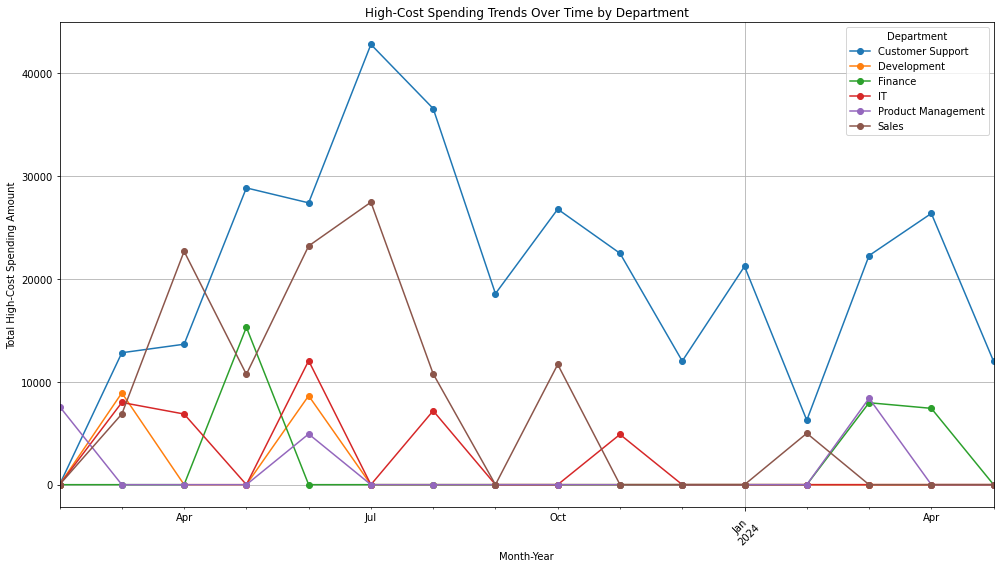

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
flag_data = pd.read_csv("csvs/flag-71.csv")

# Convert 'processed_date' to datetime for time-based analysis
flag_data["processed_date"] = pd.to_datetime(flag_data["processed_date"])

# Define high-cost threshold, let's consider transactions above the 75th percentile as "high-cost"
high_cost_threshold = flag_data["amount"].quantile(0.75)
high_cost_data = flag_data[flag_data["amount"] >= high_cost_threshold]

# Aggregate monthly high-cost spending for each department
high_cost_data["month_year"] = high_cost_data["processed_date"].dt.to_period("M")
monthly_spending = (
    high_cost_data.groupby(["department", "month_year"])["amount"]
    .sum()
    .unstack()
    .fillna(0)
)

# Plot high-cost spending trends over time for each department
plt.figure(figsize=(12, 8))
monthly_spending.T.plot(marker="o", linestyle="-", figsize=(14, 8))
plt.title("High-Cost Spending Trends Over Time by Department")
plt.xlabel("Month-Year")
plt.ylabel("Total High-Cost Spending Amount")
plt.xticks(rotation=45)
plt.legend(title="Department")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [ ]:
{
    "data_type": "trend",
    "insight": "Customer Support consistently leads in high-cost spending, with a peak in July 2023.",
    "insight_value": {
        "description": "The Customer Support department accounted for the highest spending, particularly in July 2023, where costs spiked significantly. This trend indicates a focus on resources or services that are critical to this department's operations, suggesting either a period of expanded support needs or a strategic investment."
    },
    "plot": {
        "plot_type": "line plot with markers",
        "title": "High-Cost Spending Trends Over Time by Department",
        "x_axis": {
            "name": "Month-Year",
            "value": "Monthly periods from earliest to latest transaction dates",
            "description": "This axis represents the monthly periods over which high-cost transactions were recorded.",
        },
        "y_axis": {
            "name": "Total High-Cost Spending Amount",
            "value": "Cumulative amount spent on high-cost transactions per month by department",
            "description": "This axis shows the total high-cost spending, isolating transactions above the 75th percentile threshold for each department.",
        },
        "description": "The plot reveals Customer Support as a dominant spender, with a marked peak in July 2023, suggesting a period of intensive spending that could be tied to specific support initiatives or resources.",
    },
    "question": "How do different departments' spending habits change over time, particularly regarding high-cost transactions?",
    "actionable_insight": "This analysis suggests a need for budget scrutiny within Customer Support, particularly for future periods likely to experience similar peaks. By understanding the drivers of these expenditures, the organization can align budgets more effectively and prepare resources ahead of anticipated high-demand periods. Additionally, reviewing spending trends with other departments could uncover shared needs, reducing costs through more efficient resource allocation.",
}

{'data_type': 'analytical',
 'insight': 'There is variability in expense processing times across departments',
 'insight_value': {'description': 'There is considerable variability in the average processing times for expense reports across departments. The HR department experiences the longest average processing time, significantly higher than other departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department',
  'x_axis': {'name': 'Department',
   'value': ['Development',
    'Sales',
    'HR',
    'Customer Support',
    'Finance',
    'IT',
    'Product Management'],
   'description': 'This axis lists the departments within the organization, showcasing the diversity in their operational speeds for processing expenses.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': {'Development': '0.8 days',
    'Sales': '10.0 days',
    'HR': '15.8 days',
    'Customer Support': '10.7 days',
    'Finance': '8.9 days',
    'IT': '8.7 days',
  

### **Question 2:  Are there differences in the categories of expenses submitted by this department that could explain the faster processing?**


#### Plot the distribution of expense categories by department with processing times

This stacked bar plot presents a comprehensive view of the distribution of expense categories across departments, with the counts of expenses shown for each category within a department. This visualization aids in identifying whether certain categories within departments are processed more quickly or slowly, potentially explaining variations in processing efficiency.


<Figure size 1400x800 with 0 Axes>

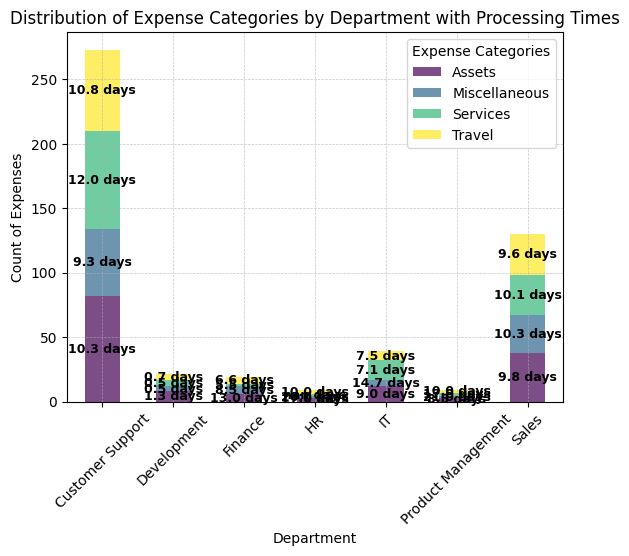

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'flag_data' contains 'department', 'category', and 'processing_period' columns
# Calculate processing period in days if not already calculated
flag_data['processed_date'] = pd.to_datetime(flag_data['processed_date'])
flag_data['opened_at'] = pd.to_datetime(flag_data['opened_at'])
flag_data['processing_period'] = (flag_data['processed_date'] - flag_data['opened_at']).dt.days

# Group data by department and category to count frequencies and calculate average processing time
category_counts = flag_data.groupby(['department', 'category']).size().reset_index(name='count')
category_processing_times = flag_data.groupby(['department', 'category'])['processing_period'].mean().reset_index()

# Merging counts with processing times for richer insights
category_data = pd.merge(category_counts, category_processing_times, on=['department', 'category'])

# Pivoting data for better visualization in stacked bar plot
pivot_data = category_data.pivot(index='department', columns='category', values='count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Distribution of Expense Categories by Department with Processing Times')
plt.xlabel('Department')
plt.ylabel('Count of Expenses')
plt.xticks(rotation=45)
plt.legend(title='Expense Categories')

# Show mean processing times on bars for additional context
for n, x in enumerate([*pivot_data.index.values]):
    for (category, count), y in zip(pivot_data.loc[x].items(), pivot_data.loc[x].cumsum()):
        plt.text(n, y - (count / 2), f'{category_processing_times.loc[(category_processing_times["department"] == x) & (category_processing_times["category"] == category), "processing_period"].values[0]:.1f} days',
                 ha='center', va='center', color='black', fontweight='bold', fontsize=9)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


#### Generate JSON Description for the Insight

In [2]:
{
    "data_type": "diagnostic",
    "insight": "Processing Times are uniform across expense categories in departments",
    "insight_value": {
        "description": "The analysis reveals no significant differences in the processing times of various expense categories across departments, suggesting that the speed of processing is not influenced by the nature of the expenses themselves but may be attributed to other factors."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Categories by Department with Processing Times",
        "x_axis": {
            "name": "Department",
            "value": "All departments analyzed",
            "description": "This axis categorizes expenses into different departments to illustrate variations in expense submission patterns."
        },
        "y_axis": {
            "name": "Count of Expenses",
            "value": "Number of expenses segmented by category",
            "description": "This axis displays the count of expenses, categorized by types within each department, along with annotations showing average processing times."
        },
        "description": "The stacked bar chart displays the distribution of expenses across categories within departments, annotated with average processing times. The uniformity in processing times across different categories suggests that departmental efficiencies or specific operational practices may not be tied to the type of expenses processed."
    },
    "question": "Are there differences in the categories of expenses submitted by this department that could explain the faster processing?",
    "actionable_insight": {
        "description": "Given the uniform processing times across expense categories, it is advisable for the organization to look beyond the nature of expenses to understand departmental processing speed disparities. Factors such as departmental staffing, the efficiency of workflow systems, or even the use of automated tools could play a significant role. A further analysis of these operational aspects could provide more definitive answers and help in implementing strategies to enhance processing efficiency across all departments."
    }
}


{'data_type': 'diagnostic',
 'insight': 'Processing Times are uniform across expense categories in departments',
 'insight_value': {'description': 'The analysis reveals no significant differences in the processing times of various expense categories across departments, suggesting that the speed of processing is not influenced by the nature of the expenses themselves but may be attributed to other factors.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Categories by Department with Processing Times',
  'x_axis': {'name': 'Department',
   'value': 'All departments analyzed',
   'description': 'This axis categorizes expenses into different departments to illustrate variations in expense submission patterns.'},
  'y_axis': {'name': 'Count of Expenses',
   'value': 'Number of expenses segmented by category',
   'description': 'This axis displays the count of expenses, categorized by types within each department, along with annotations showing average processing times.'

### **Question 3:  Are there any specific brackets of amounts these expenses from the Development department fall into that could explain the faster processing?**


#### Processing Period by Expense Amount Brackets in Development Department

This visualization showcases how processing times vary across different expense amount-brackets within the Development department. The boxplot shows spread and median processing periods for each bracket, while the line graph overlays the proportion of total expenses falling within these brackets (for easy visualization). This dual-axis plot helps to understand if smaller or larger expense amounts correlate with quicker processing times and highlights distribution of expense magnitudes within the department.


/tmp/ipykernel_36050/1162767483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_expenses['amount_bracket'] = pd.cut(dev_expenses['amount'], bins=bins, labels=labels)
/tmp/ipykernel_36050/1162767483.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='amount_bracket', y='processing_period', data=dev_expenses, palette='coolwarm', ax=ax1)


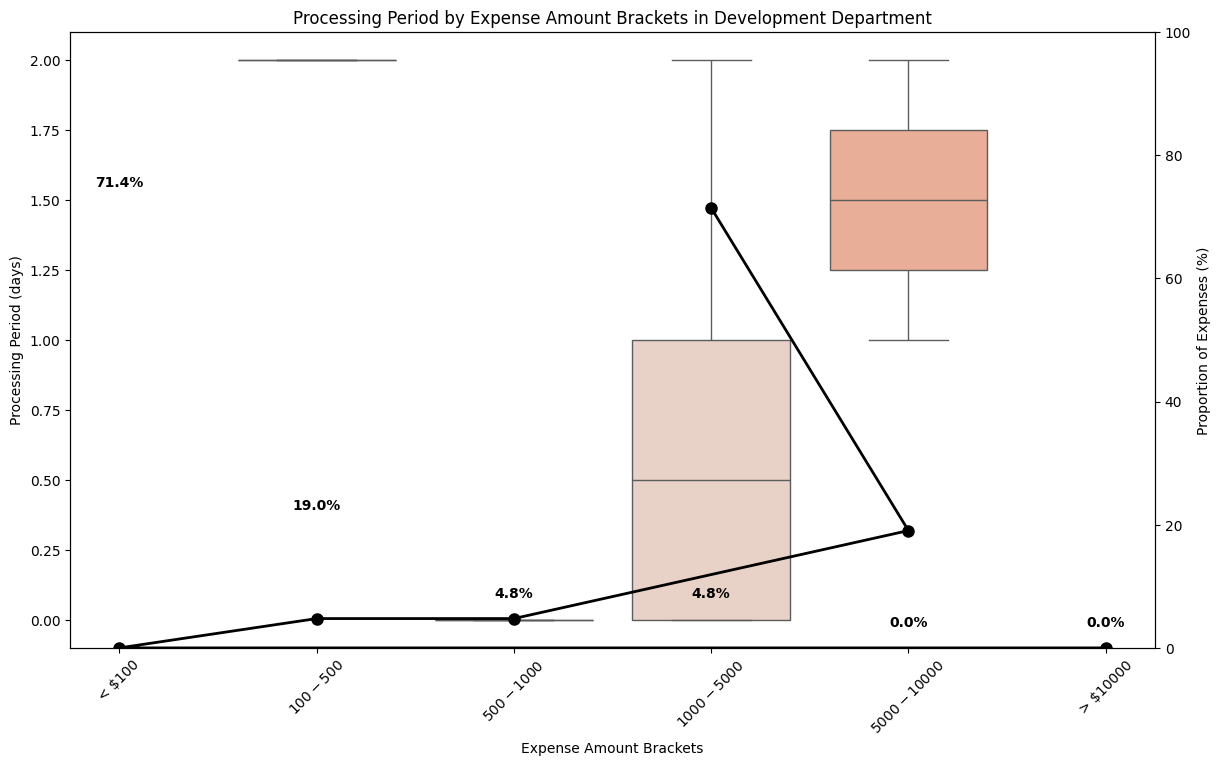

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'flag_data' contains 'department', 'amount', and 'processing_period' columns
# and is already loaded with the data

# Filter data to only include the Development department
dev_expenses = flag_data[flag_data['department'] == 'Development']

# Define the amount brackets
bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '$5000 - $10000', '> $10000']
dev_expenses['amount_bracket'] = pd.cut(dev_expenses['amount'], bins=bins, labels=labels)

# Calculate the proportion of expenses in each bracket
bracket_counts = dev_expenses['amount_bracket'].value_counts(normalize=True) * 100

# Create the box plot to visualize processing periods by amount brackets
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.boxplot(x='amount_bracket', y='processing_period', data=dev_expenses, palette='coolwarm', ax=ax1)
ax1.set_title('Processing Period by Expense Amount Brackets in Development Department')
ax1.set_xlabel('Expense Amount Brackets')
ax1.set_ylabel('Processing Period (days)')
ax1.tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Create a twin axis to show the proportion of expenses on the same plot
ax2 = ax1.twinx()
ax2.plot(bracket_counts.index, bracket_counts.values, color='k', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('Proportion of Expenses (%)')
ax2.set_ylim(0, 100)  # Limit y-axis for proportion to 100%
ax2.grid(False)  # Turn off grid for the secondary axis to avoid visual clutter

# Adding annotations for proportions
for i, val in enumerate(bracket_counts.values):
    ax2.text(i, val + 3, f'{val:.1f}%', color='black', ha='center', va='bottom', fontweight='bold')

plt.show()


#### Generate JSON Description for the Insight

In [3]:
{
    "data_type": "diagnostic",
    "insight": "Lower expense brackets has faster processing",
    "insight_value": {
        "description": "Expenses under $100, which constitute 71.4% of the submissions from the Development department, are processed almost immediately (0 days), contributing significantly to the department's overall faster processing times. In contrast, expenses between $100 and $500, while constituting 19% of submissions, take considerably longer (2 days)."
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Expense Processing Times by Amount Brackets in Development Department",
        "x_axis": {
            "name": "Expense Amount Brackets",
            "value": ["< $100", "$100-$500", "$500-$1000", "$1000-$5000"],
            "description": "This axis categorizes expenses into distinct brackets to illustrate how processing times vary with the amount of the expense."
        },
        "y_axis": {
            "name": "Processing Time (days)",
            "value": "Variable processing times",
            "description": "This axis displays the processing time required for each expense bracket, highlighting the trend of quicker processing for lower amounts."
        },
        "description": "The analysis reveals a clear trend: lower expense amounts are processed more rapidly, contributing to the Development department's overall efficiency. The immediate processing of the smallest expense bracket, which makes up the majority of submissions, significantly lowers the average processing time for the department."
    },
    "question": "Are there any specific brackets of amounts these expenses from the Development department fall into that could explain the faster processing?",
    "actionable_insight": {
        "description": "Understanding that lower expense amounts are processed more quickly suggests that the Development department may be benefiting from streamlined approval processes for smaller amounts. To leverage this efficiency, other departments might consider adopting similar streamlined processes for lower-cost expenses. Additionally, investigating why expenses in the $100-$500 bracket take longer to process could help in identifying bottlenecks and implementing solutions to enhance processing times across all brackets."
    }
}


{'data_type': 'diagnostic',
 'insight': 'Lower expense brackets has faster processing',
 'insight_value': {'description': "Expenses under $100, which constitute 71.4% of the submissions from the Development department, are processed almost immediately (0 days), contributing significantly to the department's overall faster processing times. In contrast, expenses between $100 and $500, while constituting 19% of submissions, take considerably longer (2 days)."},
 'plot': {'plot_type': 'histogram',
  'title': 'Expense Processing Times by Amount Brackets in Development Department',
  'x_axis': {'name': 'Expense Amount Brackets',
   'value': ['< $100', '$100-$500', '$500-$1000', '$1000-$5000'],
   'description': 'This axis categorizes expenses into distinct brackets to illustrate how processing times vary with the amount of the expense.'},
  'y_axis': {'name': 'Processing Time (days)',
   'value': 'Variable processing times',
   'description': 'This axis displays the processing time required

**Question 4: Can the efficient practices from this department be implemented in other departments to standardize processing times?**


The Development department demonstrates a highly efficient process for handling low-cost expenses, which are processed almost instantaneously. This approach could serve as a model for other departments experiencing slower processing times.

To improve overall expense processing efficiency across the organization, it is recommended to analyze and potentially adopt the streamlined procedures used by the Development department for managing low-cost expenses. This could involve simplifying approval protocols for small amounts, enhancing the use of automation tools, or providing additional training to ensure all departments handle expenses under a certain threshold with similar speed and efficiency. Conducting pilot implementations in departments with the longest processing times could provide valuable data on the impact of these changes and help refine the approach before a wider rollout. Additionally, regular review sessions to assess the effectiveness of these new practices should be established to ensure they meet the organization’s financial control standards and operational goals.

### Summary of Findings (Flag 71):

1. **High-Cost Spending Trends**: Analysis from Question 1 reveals that Customer Support consistently leads in high-cost spending, with a significant peak in July 2023. This suggests a focus on critical resources or strategic investments during this period, highlighting the need for budget scrutiny and potential resource alignment across departments.

2. **Uniform Processing Times Across Categories**: Insights from Question 2 indicate that processing times are uniform across different expense categories within departments. This suggests that factors other than the nature of expenses, such as staffing or workflow systems, may influence processing efficiency, pointing to areas for operational improvement.

3. **Expense Amount Brackets and Processing Efficiency**: Findings from Question 3 show that lower expense brackets, particularly those under $100, are processed more quickly in the Development department. This efficiency could be attributed to streamlined approval processes, offering a model for other departments to enhance processing times for smaller expenses.